In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
colName = ['statusNum', 'mailNum', 'date', 'time', 'PostOfficeNum', 'others']
df_chunk = pd.read_csv('TTS1.csv', header = None, names = colName, chunksize=10000000)

In [3]:
chunk_list = []  # append each chunk df here 

i = 0
for chunk in df_chunk:
#     chunk_filter = chunk_preprocessing(chunk)
#     chunk_list.append(chunk_filter)
    
# df_concat = pd.concat(chunk_list)
# status = df_concat.groupby('statusNum').agg(['count'])
# status
#     data = chunk
    i = i + 1
i
# data.tail()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


39

In [5]:
chunk.tail()

,statusNum,mailNum,date,time,PostOfficeNum,others
381043729,I2,00488397051058,2018-03-31,14:55:00,970020,
381043730,Y4,04757199999950,2018-03-31,07:40:26,100564,129
381043731,I4,04757199999950,2018-03-31,09:22:40,100564,
381043732,Y4,04757299999950,2018-03-31,13:29:38,100564,176
381043733,I4,04757299999950,2018-03-31,14:01:15,100564,


In [83]:
def chunk_preprocessing(chunk):
    chunk['datetime'] = chunk.loc[:,'date'] + " " + chunk.loc[:,'time']
    chunk = chunk.drop(['date', 'time', 'PostOfficeNum', 'others'],axis=1)
    
    # status
    status = chunk.groupby('statusNum').agg(['count'])
    
    chunk = chunk.drop(['statusNum', 'mailNum'], axis=1)
    chunk['datetime'] = pd.to_datetime(chunk['datetime'])
    chunk['hour'] = chunk.datetime.dt.hour
    chunk['weekday'] = chunk.datetime.dt.weekday
    chunk['month'] = chunk.datetime.dt.month
    
    # count by hour
    countByHour = chunk.groupby('hour').agg(['count'])
    # count by weekday
    countByWeekday = chunk.groupby('weekday').agg(['count'])
    # count by month
    countByMonth = chunk.groupby('month').agg(['count'])
    
    gc.collect()
    return status, countByHour, countByWeekday, countByMonth

In [84]:
status_list = []
hour_list = []
weekday_list = []
month_list = []

for chunk in df_chunk:
    status, countByHour, countByWeekday, countByMonth = chunk_preprocessing(chunk)
    status_list.append(status)
    hour_list.append(countByHour)
    weekday_list.append(countByWeekday)
    month_list.append(countByMonth)
    
status_concat = pd.concat(status_list, axis=1).sum(axis=1)
hour_concat = pd.concat(hour_list, axis=1).sum(axis=1)
weekday_concat = pd.concat(weekday_list, axis=1).sum(axis=1)
month_concat = pd.concat(month_list, axis=1).sum(axis=1)

gc.collect()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


38

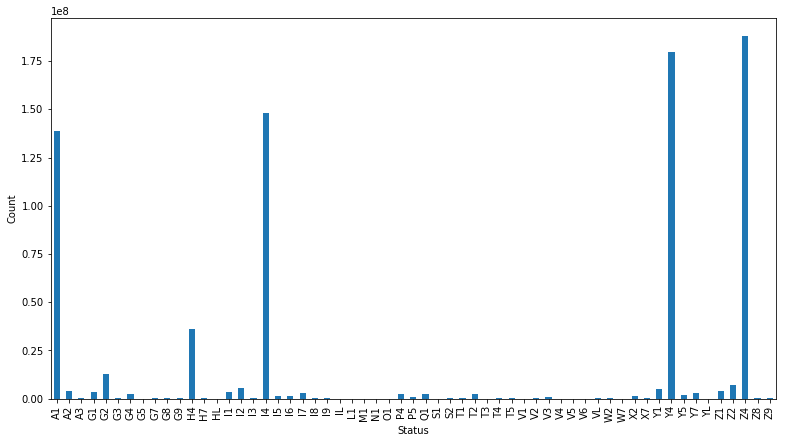

In [66]:
bar = status_concat.plot(kind='bar', figsize=(13, 7))
bar.set_xlabel("Status")
bar.set_ylabel("Count")
plt.show()

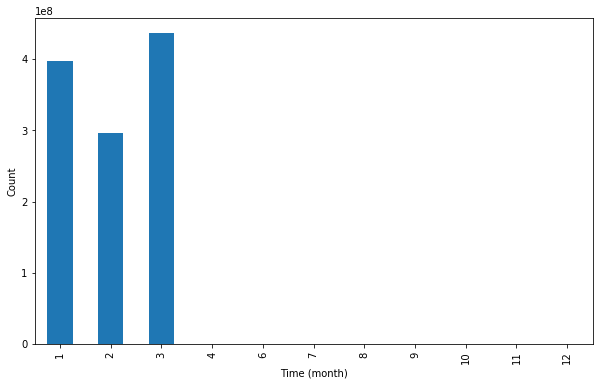

In [86]:
bar = month_concat.plot(kind='bar', figsize=(10, 6))
bar.set_xlabel("Time (month)")
bar.set_ylabel("Count")
plt.show()

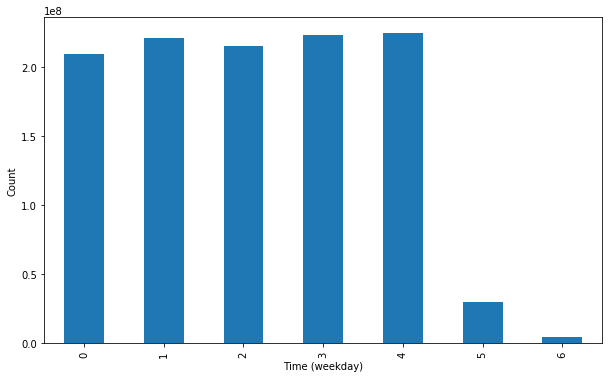

In [85]:
bar = weekday_concat.plot(kind='bar', figsize=(10, 6))
bar.set_xlabel("Time (weekday)")
bar.set_ylabel("Count")
plt.show()

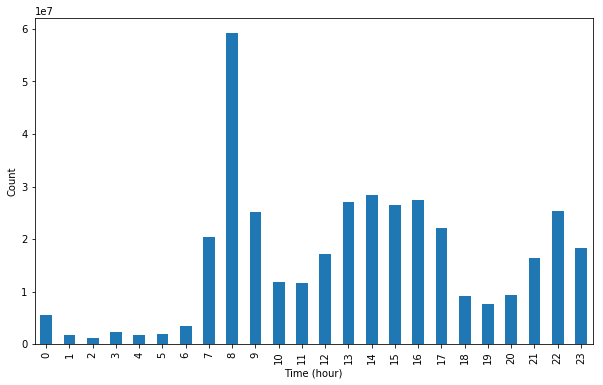

In [69]:
bar = hour_concat.plot(kind='bar', figsize=(10, 6))
bar.set_xlabel("Time (hour)")
bar.set_ylabel("Count")
plt.show()

# Testing
Test the data in period of 1 day.

## Status count

In [6]:
firstDay = data[data['date'] == '2018-01-01'].drop(['date', 'time', 'PostOfficeNum', 'others'],axis=1)
secondDay = data[data['date'] == '2018-01-02'].drop(['date', 'time', 'PostOfficeNum', 'others'],axis=1)
len(secondDay)

997687

In [80]:
status1 = firstDay.statusNum.unique()
status2 = secondDay.statusNum.unique()
len(status)

20

In [15]:
status1 = firstDay.groupby('statusNum').agg(['count'])
status2 = secondDay.groupby('statusNum').agg(['count'])
status = pd.merge(status1, status2, left_index=True, right_index=True).sum(axis=1)
# status = [S[1] for S in status]

In [16]:
status

statusNum
A1    253735
A3       371
G4       265
H4     42702
I2      9320
I3        59
I4    232603
I7      2653
P4      4432
P5       204
T2      1768
V2       743
V4        12
W2       427
X2      1744
Y4    267639
Z1      6821
Z2      9579
Z4    120929
dtype: int64

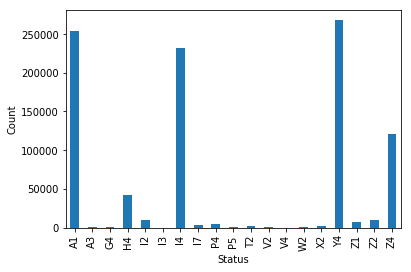

In [17]:
bar = status.plot(kind='bar')
bar.set_xlabel("Status")
bar.set_ylabel("Count")
plt.show()

## Status by time

In [55]:
firstDay = data[data['date'] == '2018-01-01']
# firstDay.dtypes
firstDay['datetime'] = firstDay.loc[:,'date'] + " " + firstDay.loc[:,'time']
firstDay = firstDay.drop(['date', 'time'], axis=1)
firstDay['datetime'] = pd.to_datetime(firstDay['datetime'])
firstDay.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,statusNum,mailNum,PostOfficeNum,others,datetime
0,Y4,00000000000000,330031,003,2018-01-01 09:49:04
1,Y4,00000000000000,330031,002,2018-01-01 09:58:08
2,I4,00000000000000,330031,,2018-01-01 14:11:51
3,Y4,00000000000000,330031,006,2018-01-01 14:23:32
4,I4,00000000000000,330031,,2018-01-01 14:52:09


In [60]:
firstDay['hour'] = firstDay.datetime.dt.hour
countByHour = firstDay.groupby('hour').agg(['count']).drop(['statusNum', 'mailNum', 'PostOfficeNum', 'others'], axis=1)
countByHour

,datetime
,count
hour,
0,11
1,1
2,2
5,20
6,7
7,10
8,6
9,126


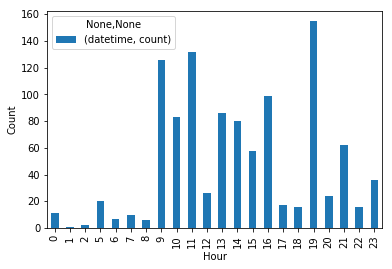

In [61]:
bar = countByHour.plot(kind='bar')
bar.set_xlabel("Hour")
bar.set_ylabel("Count")
plt.show()

In [76]:
firstDay['weekday'] = firstDay.datetime.dt.weekday
firstDay['month'] = firstDay.datetime.dt.month
firstDay.head()

,statusNum,mailNum,PostOfficeNum,others,datetime,hour,weekday,month
0,Y4,00000000000000,330031,003,2018-01-01 09:49:04,9,0,1
1,Y4,00000000000000,330031,002,2018-01-01 09:58:08,9,0,1
2,I4,00000000000000,330031,,2018-01-01 14:11:51,14,0,1
3,Y4,00000000000000,330031,006,2018-01-01 14:23:32,14,0,1
4,I4,00000000000000,330031,,2018-01-01 14:52:09,14,0,1
